# EDA - Superstore dataset

<img src="progress_img.png" style="width: 800px" heigh = "100px" align="center"/>

### 1. Difinition problem and understanding data

#### About data：
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.  

You can even take this a step further and try and build a Regression model to predict Sales or Profit.  

Go crazy with the dataset, but also make sure to provide some business insights to improve.  

dataset：https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data
  

#### Difinition problem：
* What is the best-selling product in the store?  
* What is the highest-selling product?  
* What is the most profitable product? What are the top five most profitable products?  
* Are the top five products by sales revenue the same as the top five most profitable products?  
* How is the sales performance of the same products in the US region?  
* Which state has the highest sales and profit?  
* How is the revenue situation in the store?  
* What is the proportion of customers by segment?  
* What are the highest-demand categories and products by segment?  
* Are there more new customers or returning customers?
* RFM Analysis

#### Understanding data：
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

### 2. Load packages and data wrangling

#### 2-1 Load packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
glob.glob(r"*.csv")

['Sample - Superstore.csv']

In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding= "windows-1252")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.shape

(9994, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The following point can be observed：
* Profit column min value is -6599.98, mean value is 28.6569, too differences need to pay attention to whether there are extreme values.

In [11]:
# confirm null value and duplicated value
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df.duplicated().sum()

0

### 3. EDA

#### 3-1 What is the best-selling product in the store?

In [13]:
# confirm how many features each columns has 
df_product = df[['Ship Mode', 'Customer ID', 'Customer Name', 'Segment','Country', 'Product ID', 'Product Name','Category', 'Sub-Category']]
for feature in df_product.columns:
    print(feature, ":", df[feature].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
Product ID : 1862
Product Name : 1850
Category : 3
Sub-Category : 17


In [14]:
product_group = df.groupby(df["Product Name"]).sum()["Quantity"]
top_10_sell_products = product_group.sort_values(ascending = False)[:10]
top_10_sell_products

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\2983403206.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group = df.groupby(df["Product Name"]).sum()["Quantity"]


Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

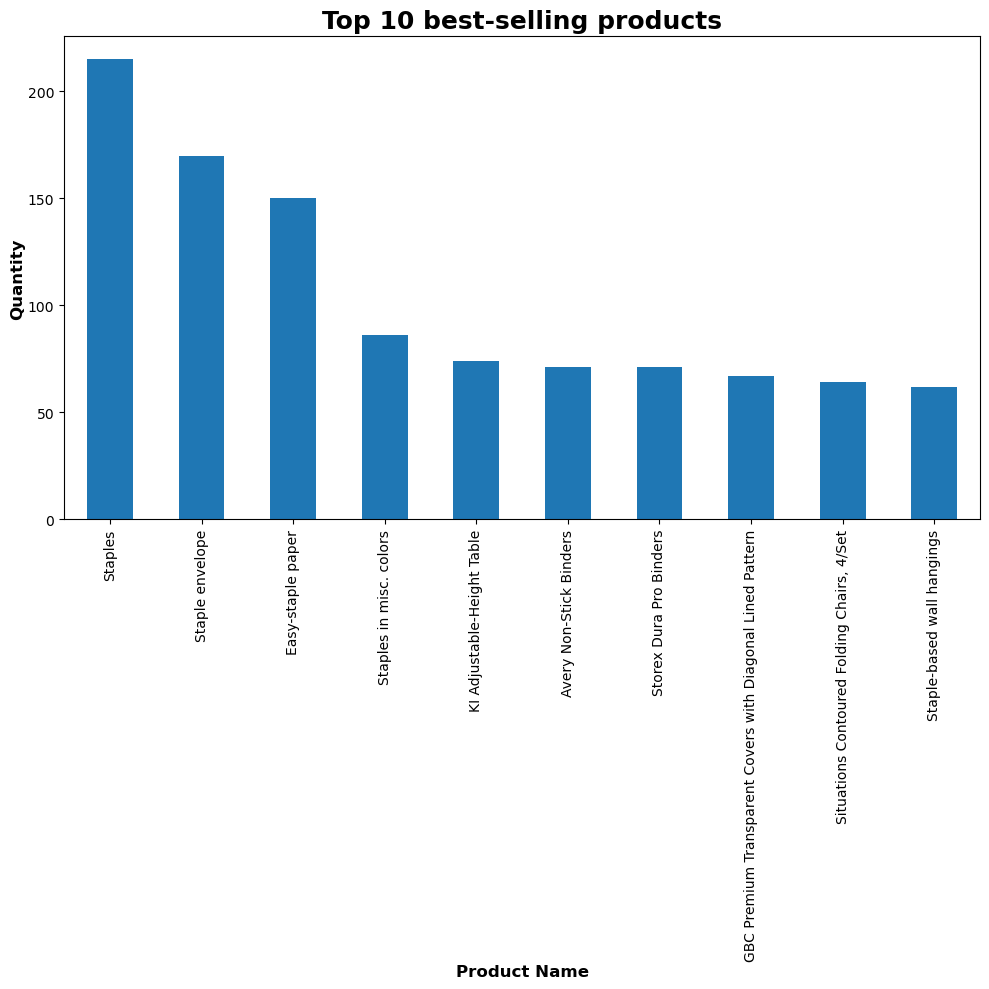

In [15]:
# plotting
fig = plt.figure(figsize = (10,10))
plt.title("Top 10 best-selling products", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold",fontsize = 12, labelpad = 2)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 2)
top_10_sell_products.plot(kind = "bar")
plt.tight_layout()
plt.show()

#### 3-2 What is the highest-sales product?

In [16]:
top_5_sales = df.groupby(df["Product Name"]).sum()["Sales"].sort_values(ascending = False)[:5]
top_5_sales

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\973816053.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_sales = df.groupby(df["Product Name"]).sum()["Sales"].sort_values(ascending = False)[:5]


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

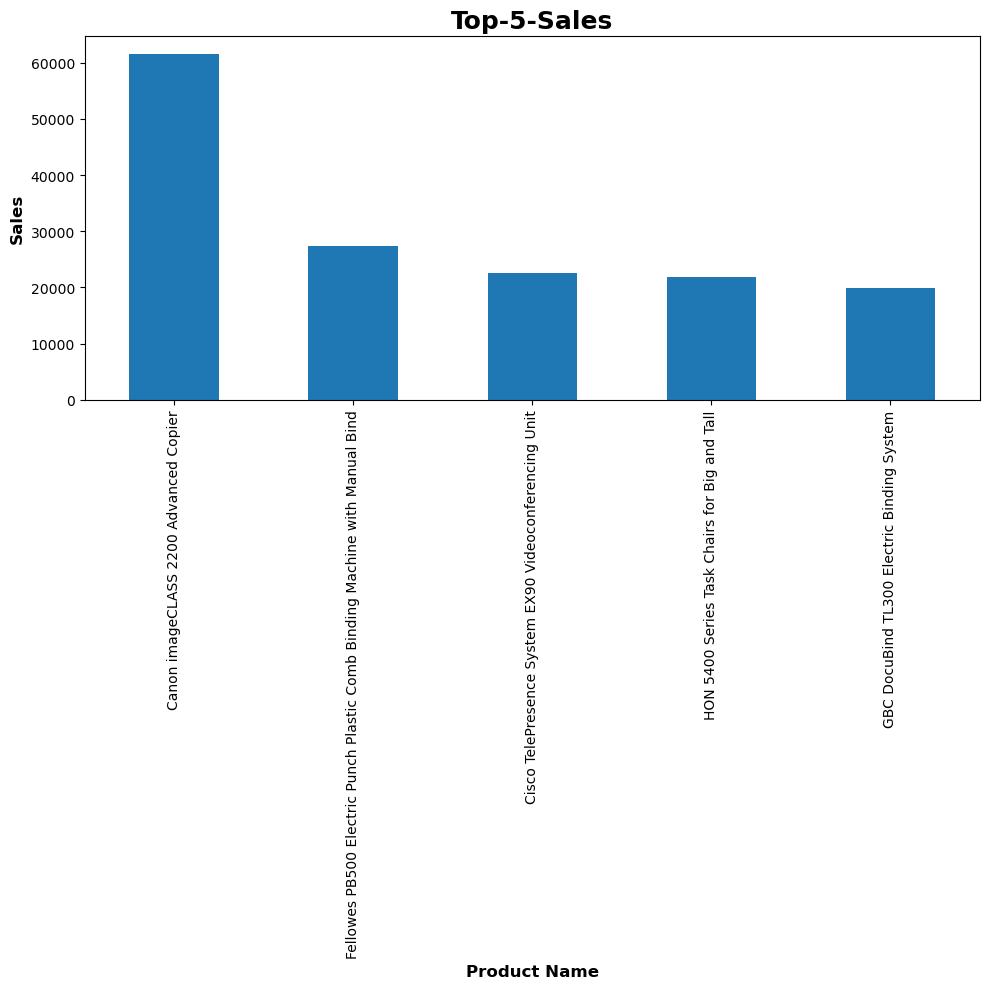

In [18]:
# plotting
fig = plt.figure(figsize = (10, 10))
plt.title("Top-5-Sales", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12)
plt.ylabel("Sales", weight = "bold", fontsize = 12)
top_5_sales.plot(kind = "bar")
plt.tight_layout()
plt.show()

#### 3-3 What is the most profitable product?

In [22]:
top_5_profit_product = df.groupby(df["Product Name"]).sum()["Profit"].sort_values(ascending = False)[:5]
top_5_profit_product

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\1209762389.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_5_profit_product = df.groupby(df["Product Name"]).sum()["Profit"].sort_values(ascending = False)[:5]


Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

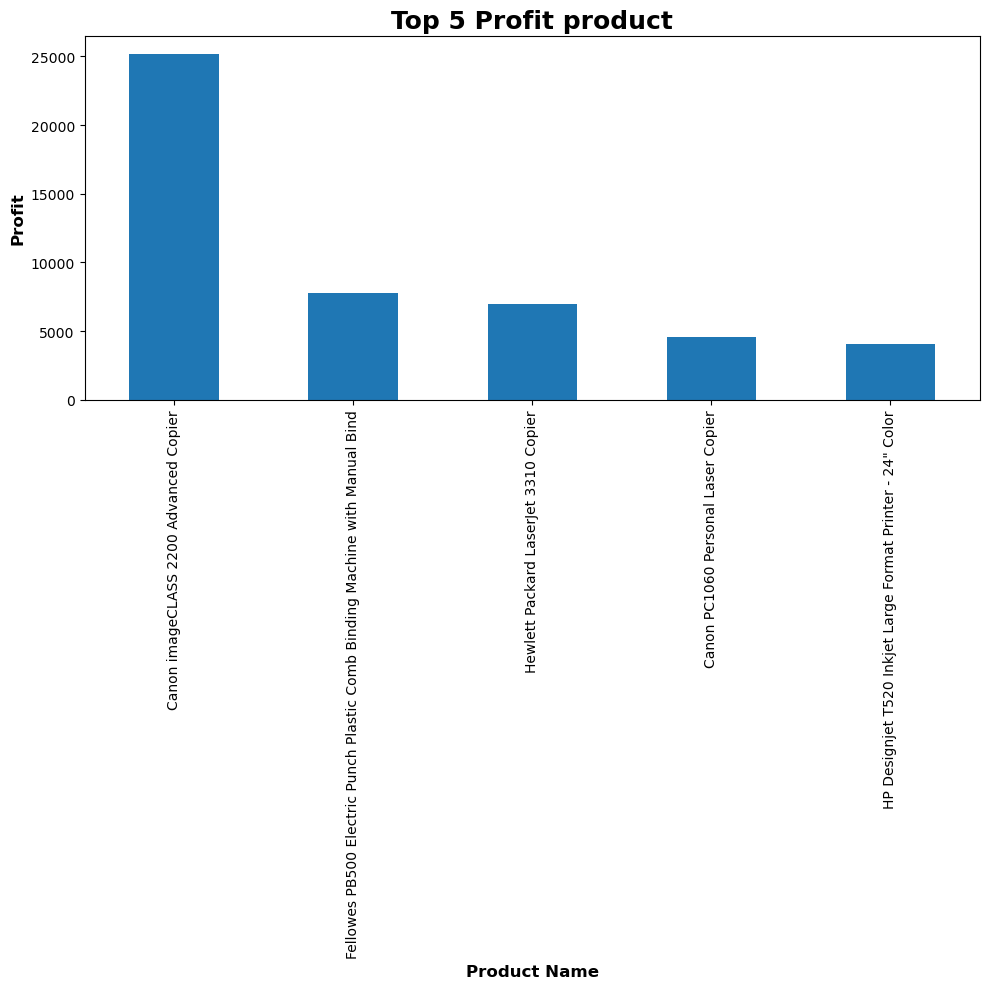

In [20]:
fig = plt.figure(figsize = (10, 10))
plt.title("Top 5 Profit product", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize =  12)
plt.ylabel("Profit", weight = "bold", fontsize = 12)
top_5_profit_product.plot(kind = "bar")
plt.tight_layout()
plt.show()

In [24]:
# Are the top five confirmed sales and the top five profits the same?
print(top_5_sales.index == top_5_profit_product.index)
print(top_5_sales.index )
print(top_5_profit_product.index)

[ True  True False False False]
Index(['Canon imageCLASS 2200 Advanced Copier',
       'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
       'Cisco TelePresence System EX90 Videoconferencing Unit',
       'HON 5400 Series Task Chairs for Big and Tall',
       'GBC DocuBind TL300 Electric Binding System'],
      dtype='object', name='Product Name')
Index(['Canon imageCLASS 2200 Advanced Copier',
       'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
       'Hewlett Packard LaserJet 3310 Copier',
       'Canon PC1060 Personal Laser Copier',
       'HP Designjet T520 Inkjet Large Format Printer - 24" Color'],
      dtype='object', name='Product Name')


The following point can be observed：
* Best-selling is Staples.
* Best-sales is Canon imageCLASS 2200 Advanced Copier.
* The top five sales include machinery, equipment and systems.
* "Canon imageCLASS 2200 Advanced Copier" and "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" have the highest sales and profits

#### 3-3-1 How is the sales performance of the "Canon imageCLASS 2200 Advanced Copier" and "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" in the US region?

In [25]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\3789321244.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales","Profit"]]


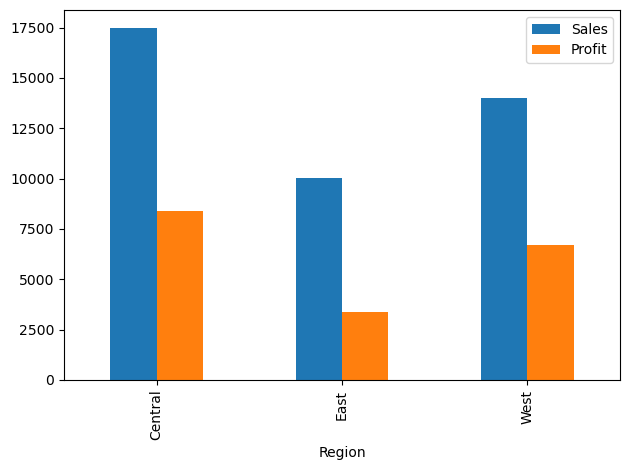

In [26]:
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]
# product.head(3)
region_group = product.groupby(["Region"]).mean()[["Sales","Profit"]]
region_group.head()

region_group.plot(kind = "bar")
plt.tight_layout()
plt.show()

The product "Canon imageCLASS 2200 Advanced Copier" is only sold in Central, East, and West. On average, product sales and profits in Central America are the best.

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\4265535678.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]


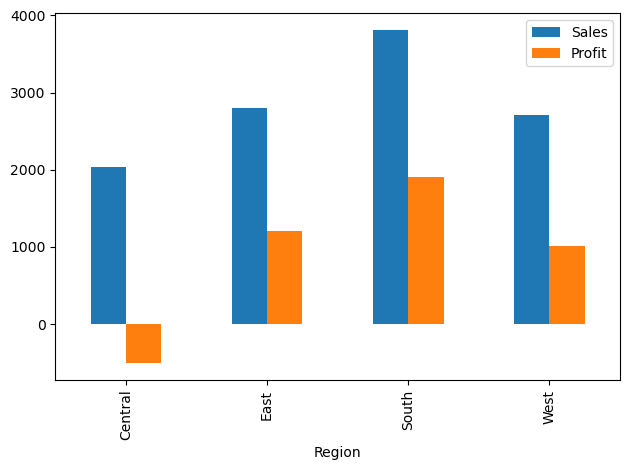

In [27]:
product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]
region_group.head()

region_group.plot(kind = "bar")
plt.tight_layout()
plt.show()


In [28]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,9/10/2017,9/15/2017,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,...,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,11/19/2017,11/21/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,...,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


The following point can be observed：
* The product "Canon imageCLASS 2200 Advanced Copier" is only sold in Central, East, and West. On average, product sales and profits in Central America are the best.
* The product "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" is sold throughout the Americas, and has the highest sales and profits in South America. However, it can be observed that the profits of this product are losses in Central America.  
  
In the second point, we mentioned the loss situation in Central America. It can be observed that the profits at index2846 and 5310 were -1143.89 and -2287.78 respectively, because of the 20% discount (Discount = 0.8)

#### 3-4 Which state has the highest sales and profit?

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\2651688624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_date = df.groupby(["State"]).sum()["Sales"].sort_values(ascending = False)


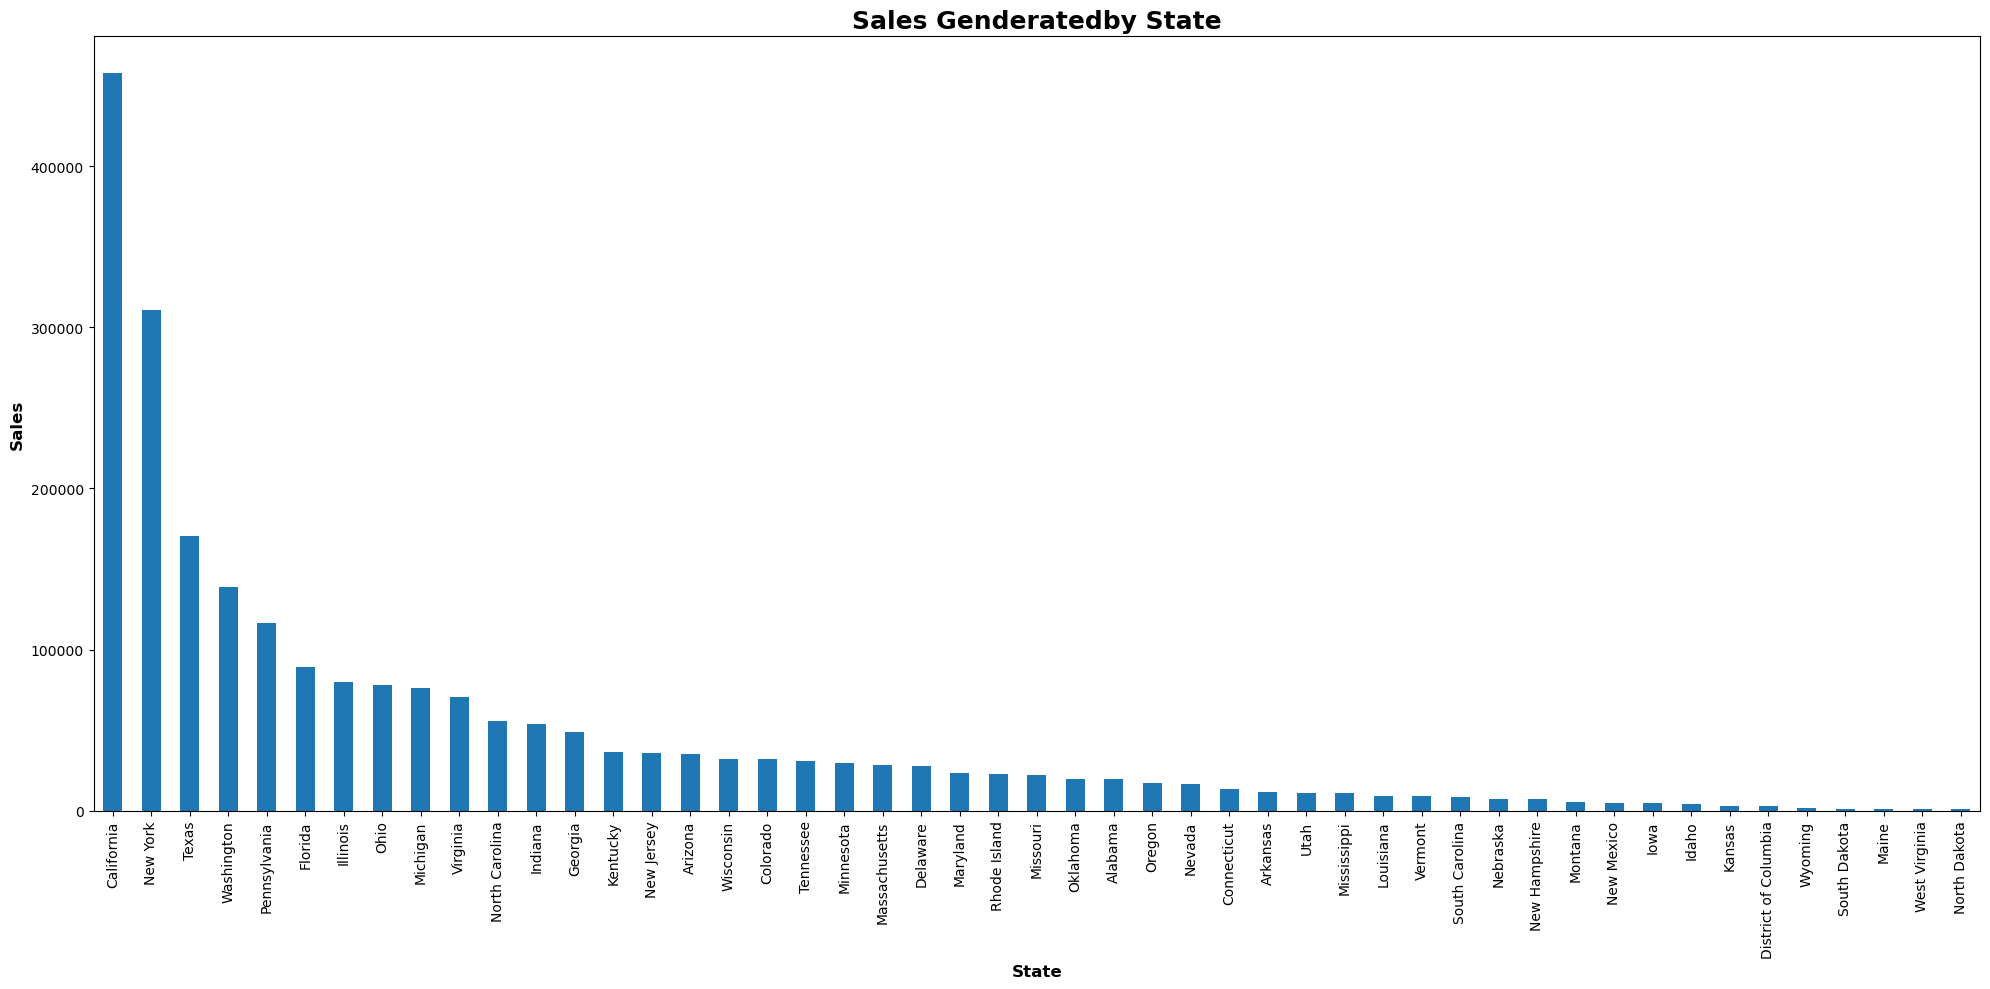

In [30]:
group_date = df.groupby(["State"]).sum()["Sales"].sort_values(ascending = False)

plt.figure(figsize = (20,10))
plt.title("Sales Genderatedby State", weight = "bold", fontsize = 18)
plt.xlabel("State", weight = "bold", fontsize = 12)
plt.ylabel("Sales", weight = "bold", fontsize = 12)
group_date.plot(kind = "bar")
plt.tight_layout()
plt.show()

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\2409647302.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_date = df.groupby(["State"]).sum()["Profit"].sort_values(ascending = False)


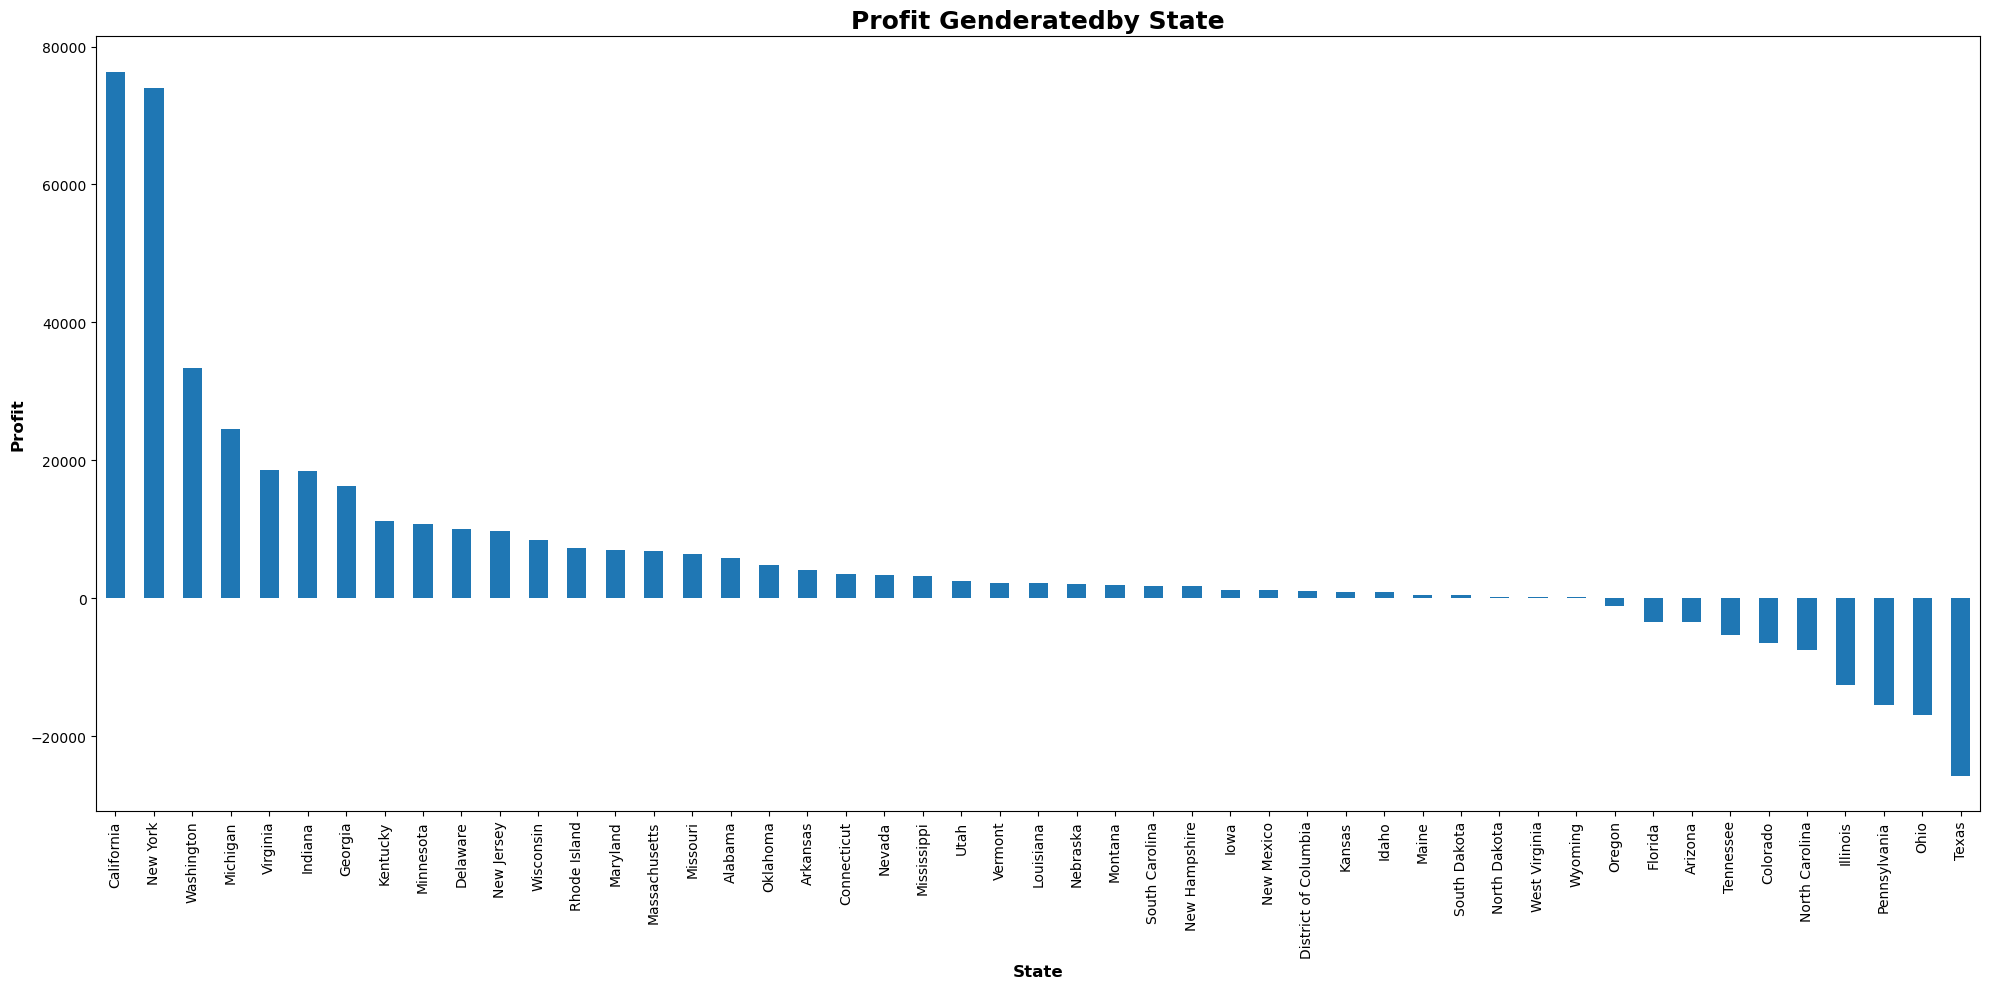

In [31]:
group_date = df.groupby(["State"]).sum()["Profit"].sort_values(ascending = False)

plt.figure(figsize = (20,10))
plt.title("Profit Genderatedby State", weight = "bold", fontsize = 18)
plt.xlabel("State", weight = "bold", fontsize = 12)
plt.ylabel("Profit", weight = "bold", fontsize = 12)
group_date.plot(kind = "bar")
plt.tight_layout()
plt.show()

The following point can be observed：
* California has the highest sales and profits.

#### 3-5 How is the revenue situation in the store?

C:\Users\coffe\AppData\Local\Temp\ipykernel_8900\1428725486.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.groupby(["Order Date"]).sum()


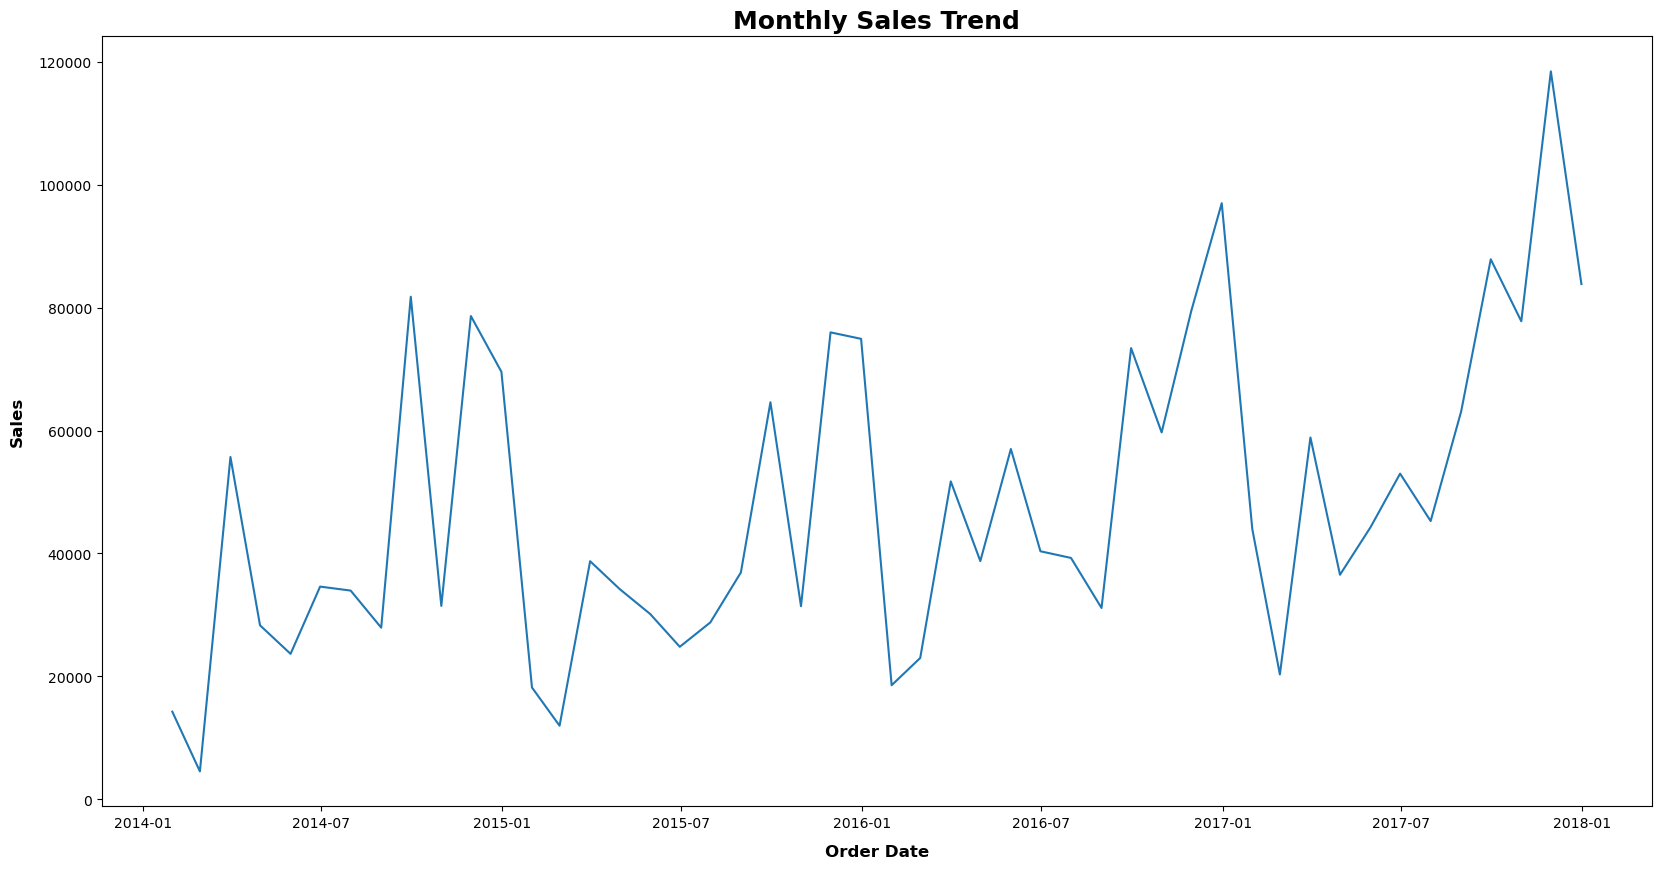

In [33]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

# monthly income
monthly_sales = df.groupby(["Order Date"]).sum()
monthly_sales = monthly_sales.resample("M").sum()

#monthly income - plotting
plt.figure(figsize = (20,10))
plt.plot(monthly_sales["Sales"])
plt.title("Monthly Sales Trend", weight = "bold", fontsize = 18)
plt.xlabel("Order Date", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Sales", weight = "bold", fontsize = 12, labelpad = 10)
plt.show()

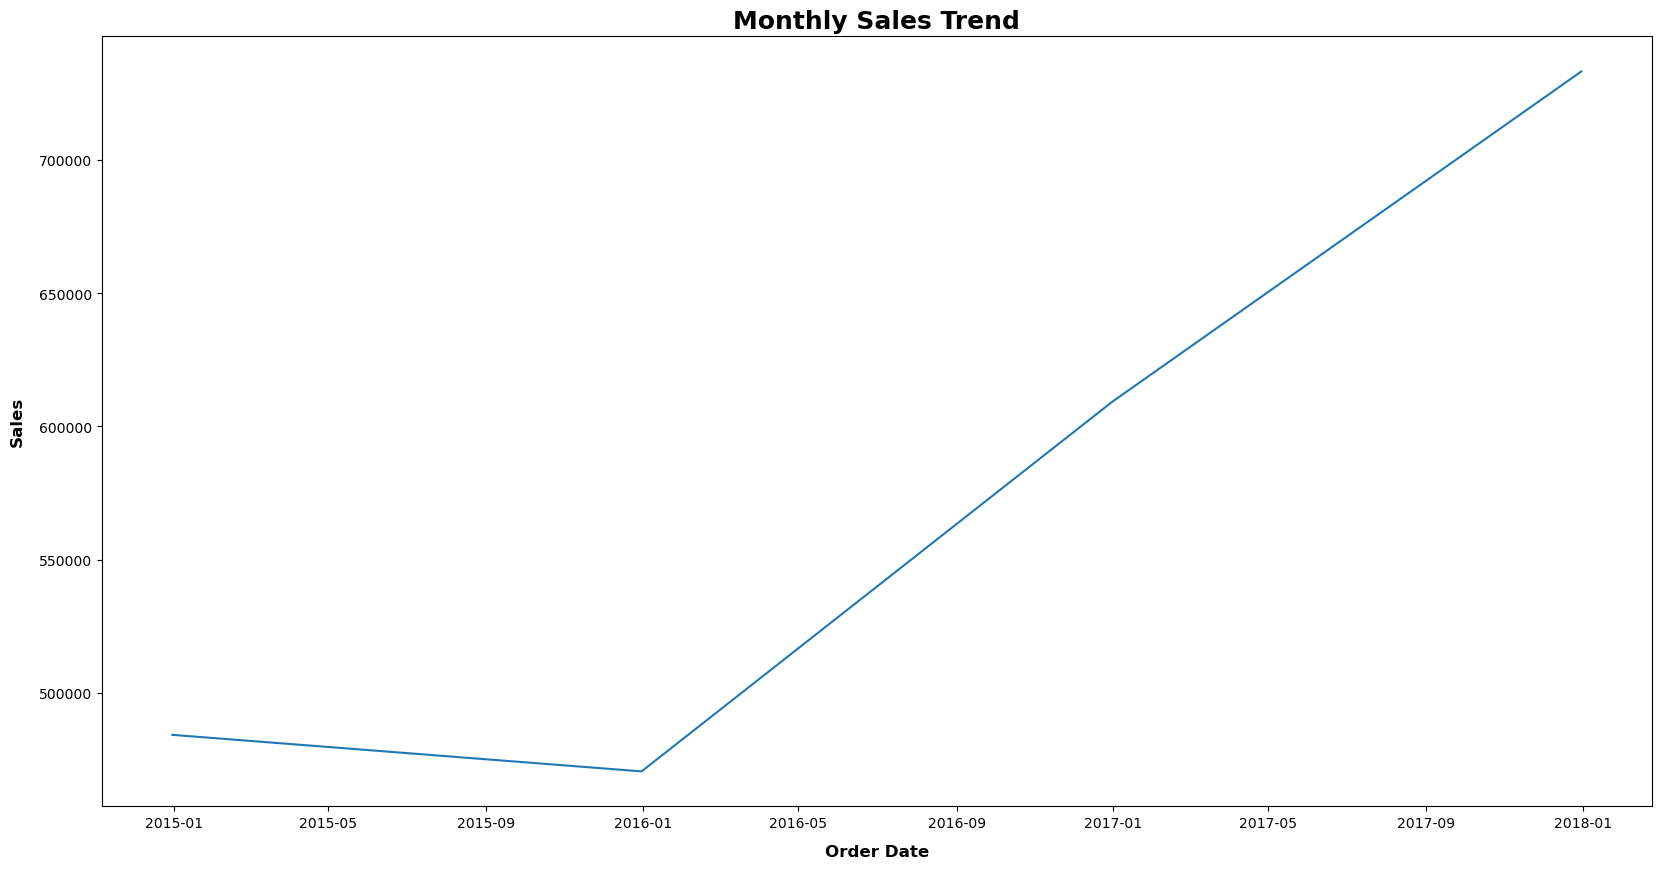

In [34]:
# annual income
yearly_sales = monthly_sales.resample("Y").sum()

# annual income - plotting
plt.figure(figsize = (20,10))
plt.plot(yearly_sales["Sales"])
plt.title("Monthly Sales Trend", weight = "bold", fontsize = 18)
plt.xlabel("Order Date", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Sales", weight = "bold", fontsize = 12, labelpad = 10)
plt.show()

The following point can be observed：

* In terms of monthly income: income decrease a lot in February every year, and high income increase in December. The overall trend is upward, but there also be a lot of decline, which may be related to discounts.
* In terms of years: sales have skyrocketed since 2016.

#### 3-6 What is the proportion of customers by segment?

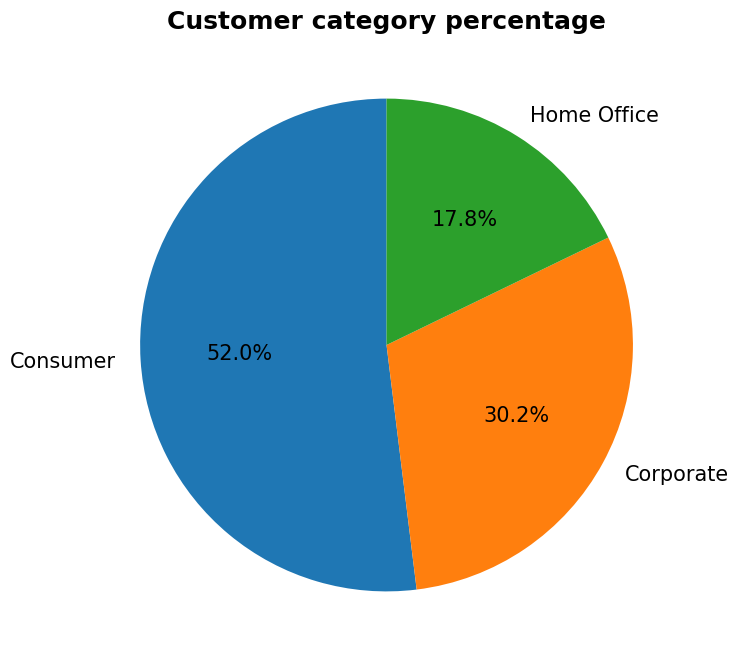

In [35]:
Segment_cnt = df["Segment"].value_counts(normalize = True).round(3)*100

plt.figure(figsize = (10,8))
plt.pie(Segment_cnt, 
        labels = df["Segment"].unique(), 
        textprops = {"size": 15},
        autopct = "%1.1f%%", 
        startangle = 90)
plt.title("Customer category percentage", weight = "bold", fontsize = 18)
plt.show()

##### 3-6-1 What are the product categories and products with the highest customer demand?

In [43]:
customer_category = df.groupby("Segment")["Category"].value_counts()["Consumer"]
customer_category

Category
Office Supplies    3127
Furniture          1113
Technology          951
Name: Category, dtype: int64

In [45]:
customer_product = df.groupby("Segment")["Product Name"].value_counts()["Consumer"]
customer_product.sum() # Confirm the product quantity. 

5191

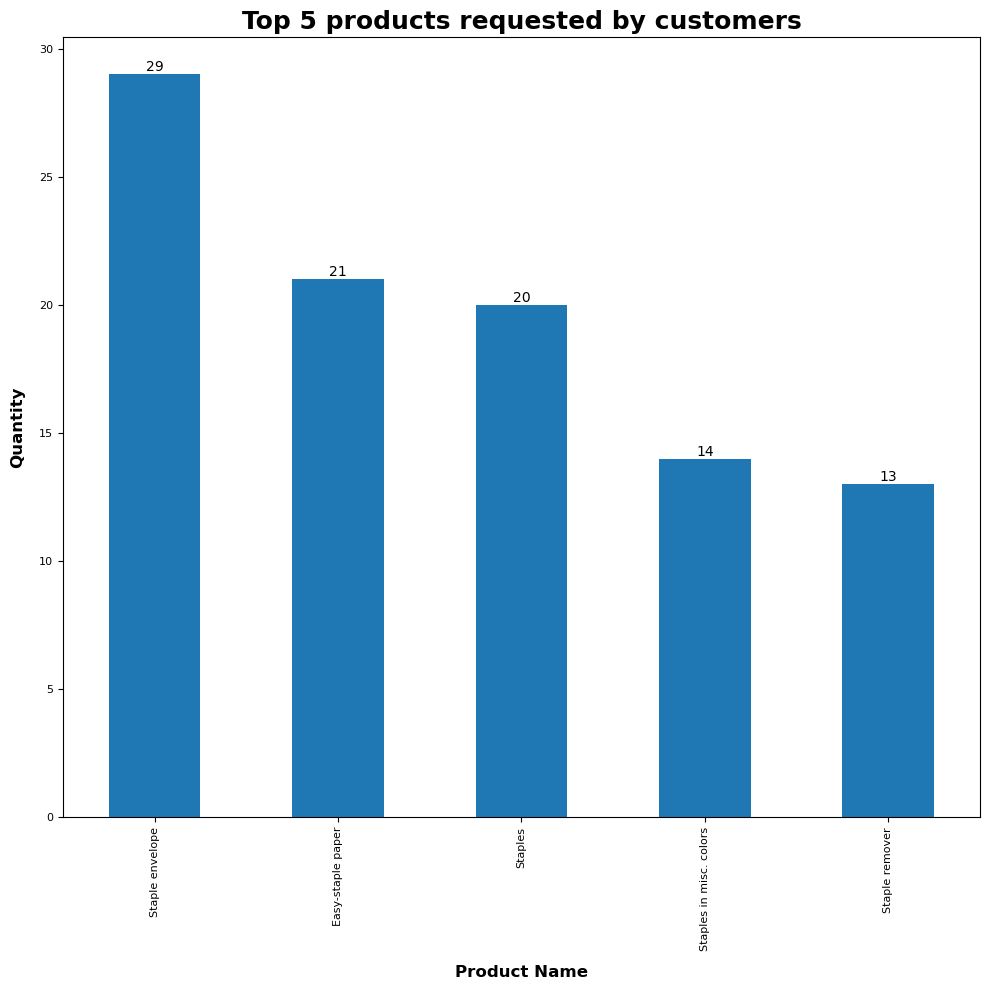

In [47]:
customer_product_top5 = customer_product[:5]
# plotting
plt.figure(figsize = (10,10))
plt.title("Top 5 products requested by customers", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = customer_product_top5.plot(kind = "bar")

# annotate
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.show()

##### 3-6-2 What are the product categories and products with the highest demand among enterprises?

In [48]:
cor_category = df.groupby("Segment")["Category"].value_counts()["Corporate"]

In [49]:
cor_product = df.groupby("Segment")["Product Name"].value_counts()["Corporate"]
cor_product.sum() 

3020

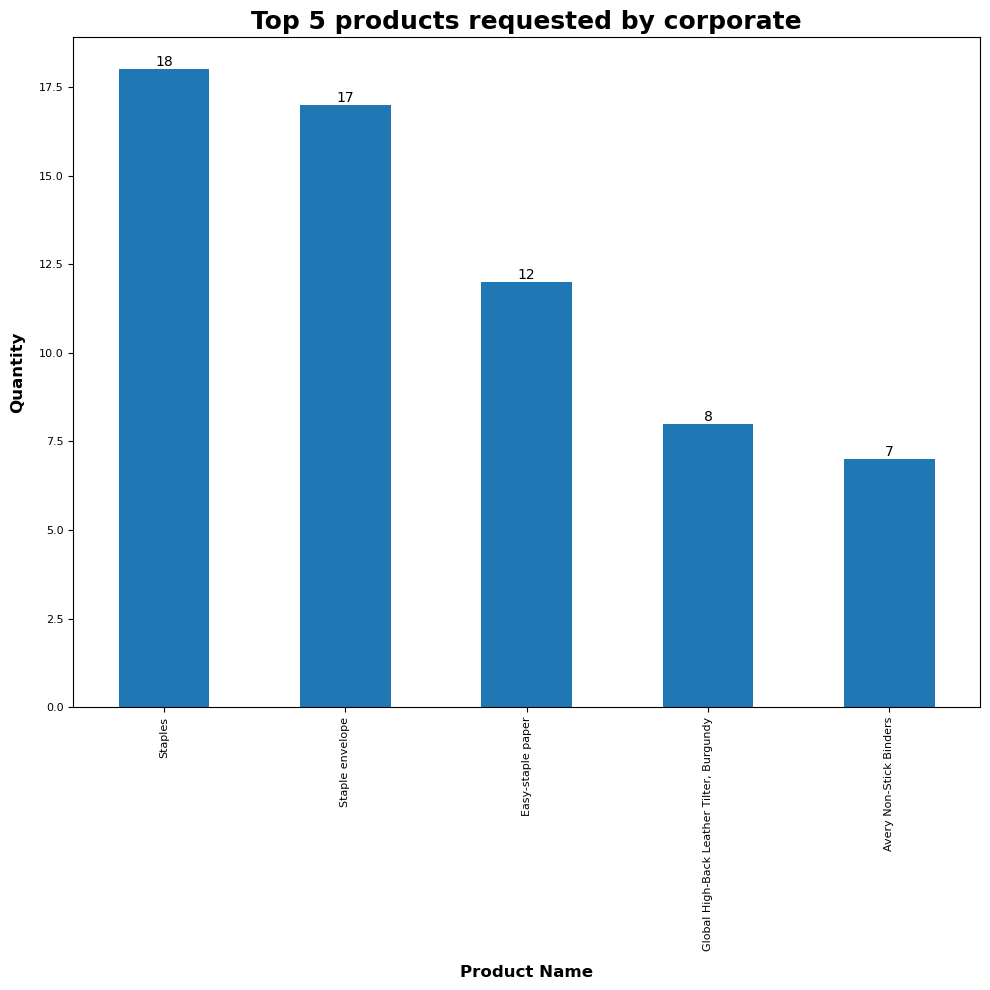

In [51]:
cor_product_top5 = cor_product[:5]
# plotting
plt.figure(figsize = (10,10))
plt.title("Top 5 products requested by corporate", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = cor_product_top5.plot(kind = "bar")

# annotate
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.show()

##### 3-6-3 What are the product categories and products with the highest demand among small businesses?

In [4]:
homeOffice_category = df.groupby("Segment")["Category"].value_counts()["Home Office"]
homeOffice_category

Category
Office Supplies    1079
Furniture           362
Technology          342
Name: Category, dtype: int64

In [53]:
homeOffice_product = df.groupby("Segment")["Product Name"].value_counts()["Home Office"]
cor_product.sum() 

3020

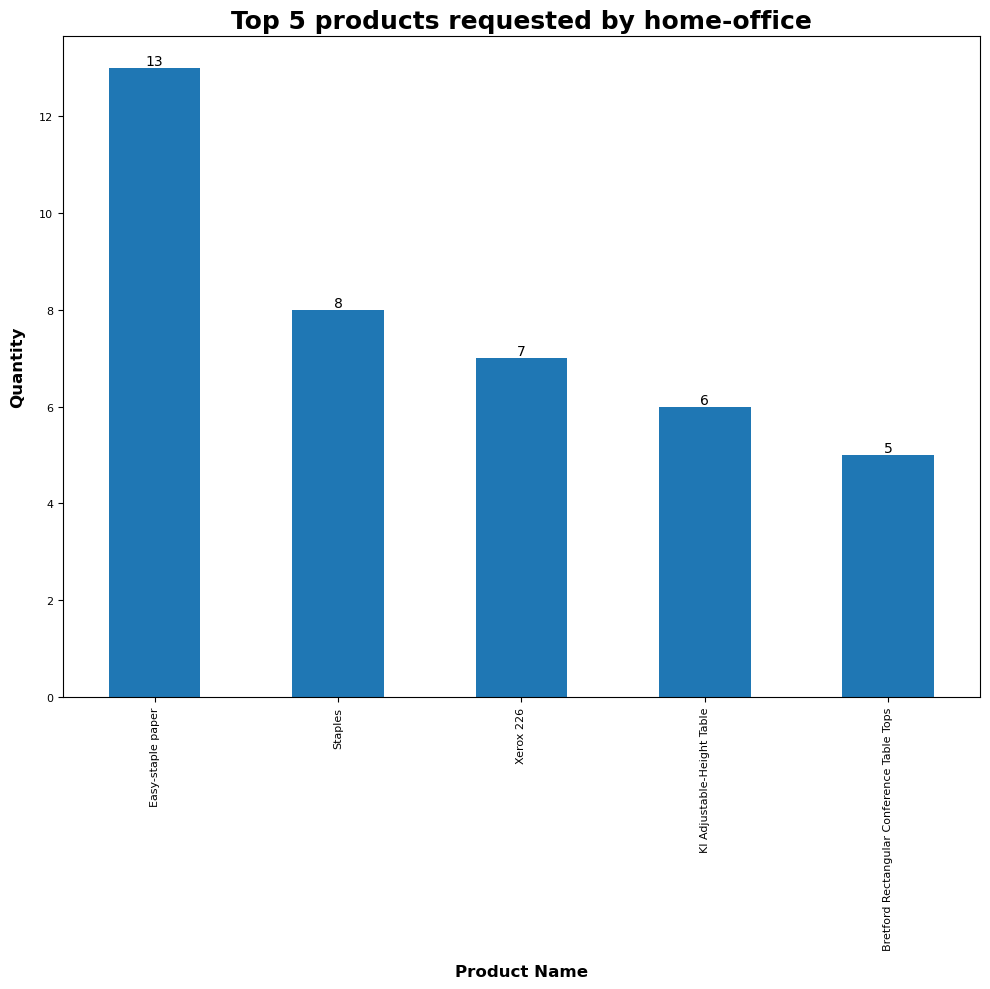

In [54]:
homeOffice_product_top5 = homeOffice_product[:5]
# plotting
plt.figure(figsize = (10,10))
plt.title("Top 5 products requested by home-office", weight = "bold", fontsize = 18)
plt.xlabel("Product Name", weight = "bold", fontsize = 12, labelpad = 10)
plt.ylabel("Quantity", weight = "bold", fontsize = 12, labelpad = 10)
ax = homeOffice_product_top5.plot(kind = "bar")

# annotate
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 8)

plt.tight_layout()
plt.show()

The following point can be observed：
* 52% of Customers by Segment are general consumers, the proportion of enterprises is 30.2% and finally home offices/small offices is 17.8%.
* In terms of consumers: The most purchased product category is office supplies. The most purchased items is staple envelope.
* In terms of corporate: The most purchased product category is office supplies. The most purchased items is staple, In addition to stationery, the top-five-requested also include leather high-back chairs.
* In terms of Home-Office: The most purchased product category is Office Supplies. The most purchased items is Easy-staple paper,  the top-five-requested also include Furniture.

#### 3-7 Are there more new customers or returning customers?

In [55]:
cusID_cnt = df.groupby("Customer ID").size().sort_values(ascending = False)

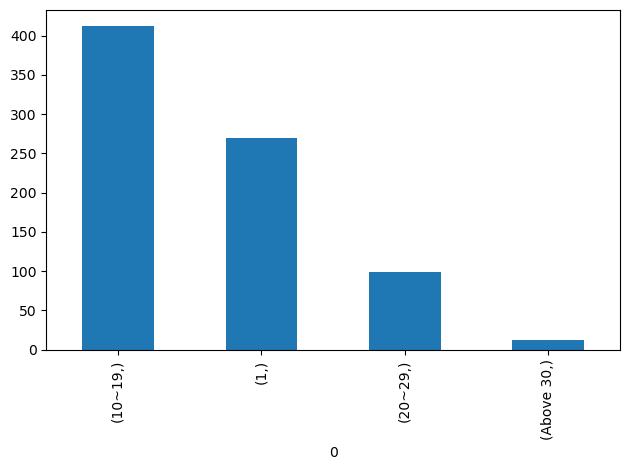

In [56]:
cusID_cnt_tmp = []

for i in range(len(cusID_cnt)):
    if (cusID_cnt[i] >= 30) :
        cusID_cnt_tmp.append("Above 30")
    elif (29 >= cusID_cnt[i] >=20) :
        cusID_cnt_tmp.append("20~29")
    elif (19 >= cusID_cnt[i] >= 10) :
        cusID_cnt_tmp.append("10~19")
    elif (2 >= cusID_cnt[i] >= 9):
        cusID_cnt_tmp.append("2~9")
    else:
        cusID_cnt_tmp.append("1") 
        
cusID_cnt_tmp_df = pd.DataFrame(cusID_cnt_tmp)
cusID_range_cnt = cusID_cnt_tmp_df.value_counts()
cusID_range_cnt.plot(kind = "bar")
plt.tight_layout()

The following point can be observed：
* It can be seen that more than 400 customers have purchased 10 to 19 times, followed by 270 new customers.

### 4. RFM Analysis 

In [4]:
df_RFM = df.copy()

In [5]:
## M (Monetary)
monetary = df_RFM.groupby("Customer ID")["Sales"].sum()
monetary = monetary.to_frame()

## F (Frequency)
frequency = df_RFM.groupby("Customer ID")["Sales"].count()
frequency = frequency.to_frame()

fm = monetary.merge(frequency, on = "Customer ID", how = "inner")
fm.rename(columns = {"Sales_x": "Monetary", "Sales_y": "Frequency"}, inplace = True)

In [6]:
## R (Recency)
df_RFM["Order Date"] = pd.to_datetime(df_RFM["Order Date"])
maximun = max(df_RFM["Order Date"])
maximun = maximun + pd.DateOffset(days = 1)  # avoid day_diff = 0
df_RFM["day_diff"] = maximun - df_RFM["Order Date"]
df_RFM["day_diff"]

recency = df_RFM.groupby("Customer ID")["day_diff"].min()
# Take the minimum value as an indicator of the customer’s latest purchase
recency = recency.to_frame()

In [7]:
## RFM merge
RFM = fm.merge(recency, on = "Customer ID", how = "inner")
RFM.rename(columns = {"day_diff": "Recency"}, inplace = True)
RFM = RFM.reset_index()

In [8]:
## RFM analytic
RFM_norm1 = RFM.drop("Customer ID", axis = 1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days 

# Take quartiles
quantiles = RFM_norm1.quantile(q = [0.25, 0.5, 0.75])

In [9]:
def R_class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# The smaller the R value, the greater the customer's value to the store.
    
def FM_class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
#The greater the FM value, the greater the customer's value to the store.

In [10]:
RFM_Segment = RFM_norm1.copy()
RFM_Segment["R_Quartile"] = RFM_Segment["Recency"].apply(R_class, args = ("Recency", quantiles))
RFM_Segment["F_Quartile"] = RFM_Segment["Frequency"].apply(FM_class, args = ("Frequency", quantiles))
RFM_Segment["M_Quartile"] = RFM_Segment["Monetary"].apply(FM_class, args = ("Monetary", quantiles))

RFM_Segment["RFMClass"] = RFM_Segment.R_Quartile.map(str) + RFM_Segment.F_Quartile.map(str) + RFM_Segment.M_Quartile.map(str)

In [11]:
# A - 重要挽留客戶 
# 重要挽留客戶約8.9%
RFM_Segment_A = RFM_Segment[(RFM_Segment["M_Quartile"] == 4) & (RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] != 4)]

len(RFM_Segment_A) # 71
len(RFM_Segment_A) / len(RFM_Segment) # 0.08953341740226986

# B - 重要保持客戶
# 約8.3%
RFM_Segment_B = RFM_Segment[(RFM_Segment["M_Quartile"] == 4) & (RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] == 4)]
RFM_Segment_B

len(RFM_Segment_B) # 66
len(RFM_Segment_B) / len(RFM_Segment) # 0.0832282471626734

# C - 重要發展客戶
# 約4%
RFM_Segment_C = RFM_Segment[(RFM_Segment["M_Quartile"] == 4) & (RFM_Segment["R_Quartile"] == 4) & (RFM_Segment["F_Quartile"] != 4)]
RFM_Segment_C

len(RFM_Segment_C) # 32
len(RFM_Segment_C) / len(RFM_Segment) # 0.0403530895334174

# D - 重要價值客戶 
# 黃金客佔全部顧客的比例約有3.6%
RFM_Segment_D = RFM_Segment[RFM_Segment["RFMClass"] == "444"]
len(RFM_Segment_D) # 29
len(RFM_Segment[RFM_Segment["RFMClass"] == "444"]) / len(RFM_Segment) # 0.03656998738965952

# 重要價值客戶總數
# 約 24.9%
len(RFM_Segment_A + RFM_Segment_B + RFM_Segment_C + RFM_Segment_D) / len(RFM_Segment)
# 0.24968474148802017

# 一般挽留客戶
# 約49.5%
RFM_Segment_gen_A = RFM_Segment[(RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] != 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_A) #393
len(RFM_Segment_gen_A) / len(RFM_Segment) # 0.49558638083228246

# 一般保持客戶
# 約7.5%
RFM_Segment_gen_B = RFM_Segment[(RFM_Segment["R_Quartile"] != 4) & (RFM_Segment["F_Quartile"] == 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_B) # 60
len(RFM_Segment_gen_B) / len(RFM_Segment) # 0.07566204287515763

# 一般發展客戶
# 約13.7%
RFM_Segment_gen_C = RFM_Segment[(RFM_Segment["R_Quartile"] == 4) & (RFM_Segment["F_Quartile"] != 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_C) # 109
len(RFM_Segment_gen_C) / len(RFM_Segment) # 0.13745271122320302

# 一般價值客戶
# 約 4.1%
RFM_Segment_gen_D = RFM_Segment[(RFM_Segment["R_Quartile"] == 4) & (RFM_Segment["F_Quartile"] == 4) & (RFM_Segment["M_Quartile"] != 4)]
len(RFM_Segment_gen_D) # 33
len(RFM_Segment_gen_D) / len(RFM_Segment) # 0.0416141235813367

0.0416141235813367

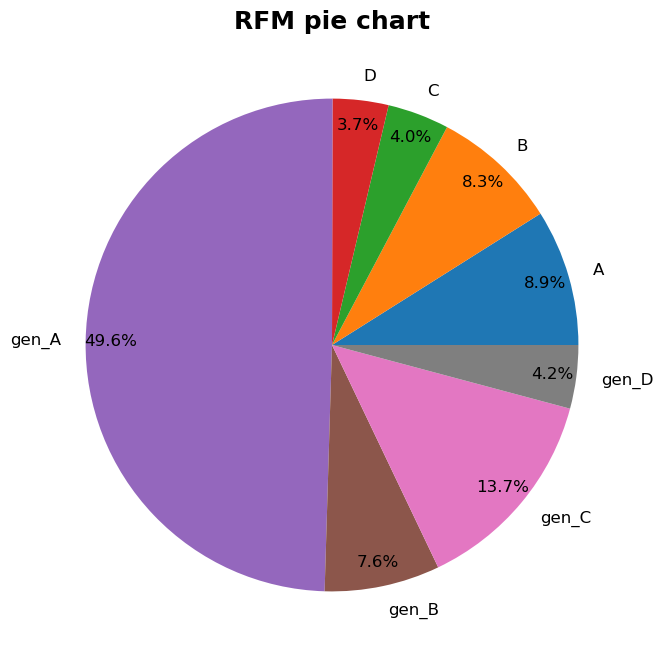

In [13]:
# RFM圖形
def float_to_percentage(number):
    percentage = round(number * 100, 2)
    # percentage_str = "{:.2f}%".format(percentage)
    # return percentage_str
    return percentage

Segment_len = len(RFM_Segment)

RFM_A_percent = float_to_percentage(len(RFM_Segment_A) / Segment_len)
RFM_B_percent = float_to_percentage(len(RFM_Segment_B) / Segment_len)
RFM_C_percent = float_to_percentage(len(RFM_Segment_C) / Segment_len)
RFM_D_percent = float_to_percentage(len(RFM_Segment_D) / Segment_len)
RFM_genA_percent = float_to_percentage(len(RFM_Segment_gen_A) / Segment_len)
RFM_genB_percent = float_to_percentage(len(RFM_Segment_gen_B) / Segment_len)
RFM_genC_percent = float_to_percentage(len(RFM_Segment_gen_C) / Segment_len)
RFM_genD_percent = float_to_percentage(len(RFM_Segment_gen_D) / Segment_len)

RFM_tem = pd.Series([RFM_A_percent,
                     RFM_B_percent,
                     RFM_C_percent,
                     RFM_D_percent,
                     RFM_genA_percent,
                     RFM_genB_percent,
                     RFM_genC_percent,
                     RFM_genD_percent],
                    index = ["A",
                              "B",
                              "C",
                              "D",
                              "gen_A",
                              "gen_B",
                              "gen_C",
                              "gen_D"])

# A:"重要挽留客戶",
# B:重要保持客戶",
# C:重要發展客戶",
# D:"重要價值客戶",
# gen_A:"一般挽留客戶",
# gen_B:"一般保持客戶",
# gen_C:"一般發展客戶",
# gen_D:"一般價值客戶"

plt.figure(figsize = (10,8))
plt.title("RFM pie chart", weight = "bold", fontsize = 18)
plt.pie(RFM_tem, 
        labels = RFM_tem.index,
        textprops = {"size": 12},
        autopct = '%.1f%%',
        pctdistance = 0.9)
plt.show()


The following point can be observed：
* 可以從圖中看出一般挽留客戶(gen_A)最多，這類型的客戶可能是因為偶然和店有了第一次的接觸，可以嘗試再聯繫，若客戶確實對品牌沒興趣，可以放棄經營。
* 第二高的是一般發展客戶(gen_B)，這類型的客戶可能是第一次消費，或是還在認識品牌的階段，可以透過後續的觀察看看其走向。
* 重要價值客戶占比約四分之一，表示客戶結構不健康，無法承受客戶流失的風險，必須維持重要價值客戶
* 重要挽留客戶(A)8.9%，最近一次消費時間較遠、消費頻率不高，但消費金額高，需要了解顧客長時間沒有消費的原因。
* 重要保持客戶(B)8.3%，最近一次的消費時間離現在較久，但消費頻率和金額都很高的客戶，要主動介紹新活動或是新商品等。
* 重要發展客戶(C)4.0%，最近一次消費時間較近、消費金額高，但頻率不高、忠誠度不高的潛力客戶，必須嚴格檢視每一次服務體驗，是否讓客戶滿意。
* 重要價值客戶(D)3.7%，這代表黃金客，不僅與品牌互動活躍度高、忠誠度高，也是高消費的客群。故除了持續不段的經營與客戶之間的關係，也要適時的提供有效的誘因，維持品牌忠誠度。

#### Power BI Dashboard

<img src="powerbi_img.png" width="900px">